<a href="https://colab.research.google.com/github/BeyzaAkgun/SeniorProjectBubbleSheet/blob/main/data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets
!pip install albumentations
!pip install torch torchvision datasets matplotlib


In [ ]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import albumentations as A
from PIL import Image
import numpy as np
from torchvision import transforms
import torch
from torch.utils.data import DataLoader
import os

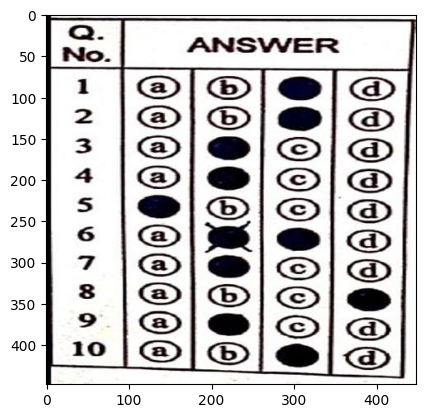

In [ ]:
dataset = load_dataset("roydev99/OMR")

train_data = dataset["train"]

image = train_data[0]['image']
label= None
plt.imshow(np.array(image))
plt.show()

In [ ]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),                     # Resize to 256x256
    transforms.RandomHorizontalFlip(p=0.5),           # Randomly flip the image horizontally
    transforms.RandomRotation(degrees=15),            # Randomly rotate the image
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Color jitter
    transforms.ToTensor(),                            # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalize RGB channels
                         std=[0.229, 0.224, 0.225])
])

In [ ]:
class HuggingFaceDataset(torch.utils.data.Dataset):
    def __init__(self, hf_dataset, transform=None):
        """
        Wrapper for Hugging Face dataset to integrate with PyTorch DataLoader.
        Args:
            hf_dataset: Hugging Face dataset split (train, validation, or test).
            transform: Transformations to apply to the images.
        """
        self.dataset = hf_dataset
        self.transform = transform

    def __len__(self):
        """Return the number of samples in the dataset."""
        return len(self.dataset)

    def __getitem__(self, idx):
        """
        Retrieve the image and label at the given index.
        Hugging Face datasets usually have 'image' and 'label' fields.
        """
        sample = self.dataset[idx]
        image = sample["image"]  # Assumes 'image' field contains the image data
        label = 0  # Replace with the actual label logic if available

        # Apply transformations
        if self.transform:
            image = self.transform(image)

        return image, label

In [ ]:
# Create PyTorch Dataset Wrappers
train_dataset = HuggingFaceDataset(train_data, transform=transform)


# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [ ]:
def visualize_images(dataloader, num_images=1):
    """Visualize a few images from the dataloader."""
    images, labels = next(iter(dataloader))
    for i in range(min(num_images, len(images))):
        image = images[i].permute(1, 2, 0).numpy()  # Convert tensor to image
        image = (image * 0.229 + 0.485).clip(0, 1)  # Unnormalize for visualization
        plt.imshow(image)
        plt.title(f"Label: {labels[i]}")
        plt.axis("off")
        plt.show()


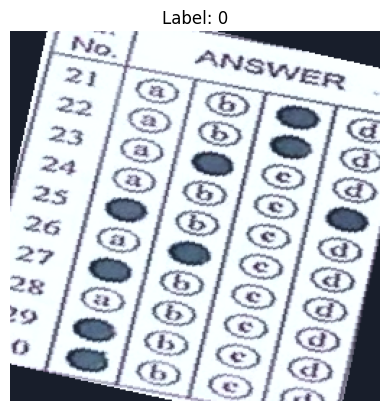

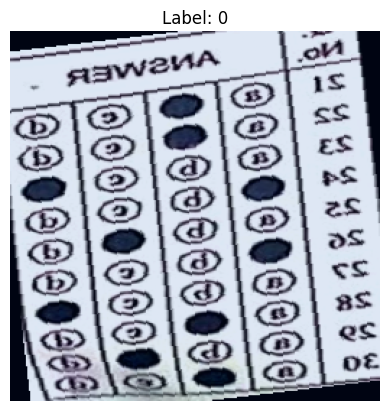

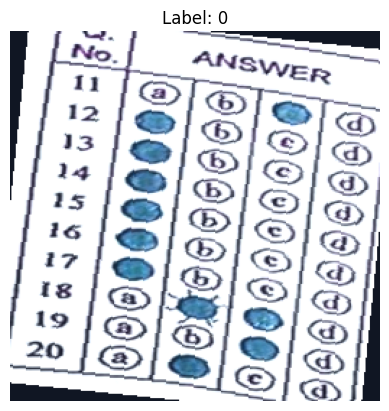

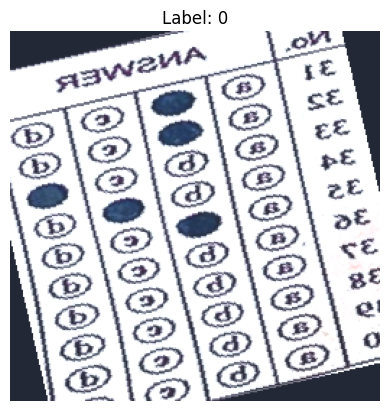

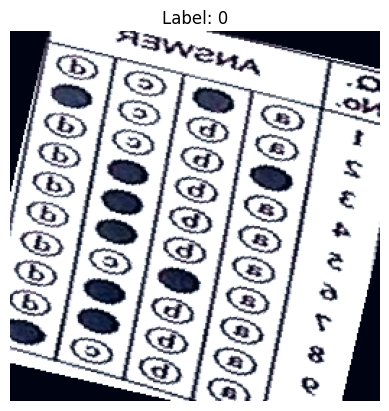

In [ ]:
visualize_images(train_loader, num_images=5)